## Titanic Dataset

**************

## Findings:

1. There are 891 rows and 12 columns
2. There are a total of 866 NaN entities in the dataset. Out of these there are 177 (roughly 20%) in the Age column and 687 (roughly 77%) in the Cabin feature of the dataset
3. So, we need to impute the NaN values in the Age column (since 20% only , which is less) and we need to replace Cabin feature by some binary classification since NaN values are high enough
4. From the countplot, we find that more people died (around 550) and less number of people survived
5. Twice the number of females survived than males and almost 5 times of males died than females who died
6. There is much higher probability of people from Pclass= 3 to not survive while high probabilty of people from Pclass = 1 to survive
7. Distribution of people as per the Sex and Pclass categories:
    - There is a very high probability for a male belonging to Pclass 3 to not survive than Pclass 2 than Pclass 1.
    - Ther is higher probability for a female belonging to Pclass 1 to survive than pclass 2 than 3
        
8. Demography of Titanic:
    - Most of the passengers belong to 20-30 age group
    - Most of the males who could not survive belonged to 20-30 age group
    - Most of the females who could suvive belonged to 20-40 age group
    
9. Analyzing SibSp feature:
    - We find that most of the passengers had no sibling on the ship or have 1 spouse/sibling
    - On closer analysis, we find that passenger with no siblings mostly belonged to Pclass 3

    
10. Analyzing the Fare feature:
    - We find that most of the passengers paid very low fare, probably that's why there were more people from Pclass 3
    
11. Average age of the Pclass 1 passengers is higher than the 2nd class which is higher than the 3rd class

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
train = pd.read_csv('titanic_train.csv')

In [98]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train.shape

(891, 12)

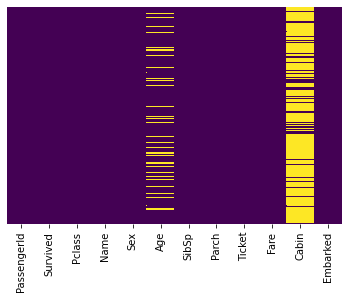

In [6]:
sns.heatmap(data = train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
print(f"there are {np.round(train['Age'].isnull().sum() * 100/len(train), 2)}% values are NaN in the Age feature of the dataset")

there are 19.87% values are NaN in the Age feature of the dataset


In [15]:
##### So there are roughly 20% values in the Age feature as NaN, so we will have to impute the values

In [14]:
print(f"there are {np.round(train['Cabin'].isnull().sum() * 100/len(train), 2)}% values are NaN in the Cabin feature of the dataset")

there are 77.1% values are NaN in the Cabin feature of the dataset


In [28]:
sns.set_style('whitegrid')

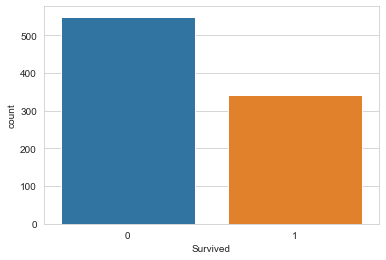

In [29]:
sns.countplot(x= 'Survived', data = train)

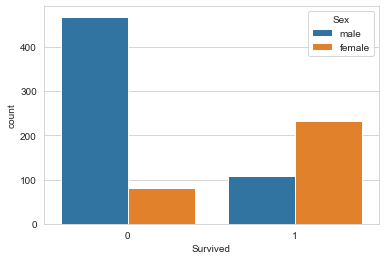

In [30]:
sns.countplot(x= 'Survived', hue = 'Sex', data = train)

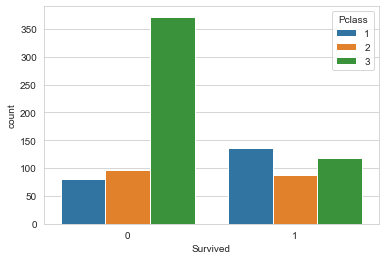

In [31]:
sns.countplot(x= 'Survived', hue = 'Pclass', data = train)

C:\Users\master\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\master\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\master\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\master\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


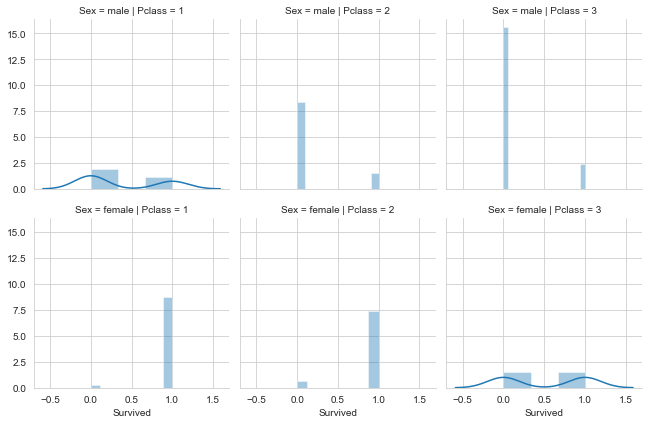

In [32]:
g = sns.FacetGrid(data = train, col = 'Pclass', row = 'Sex')
g.map(sns.distplot, 'Survived')

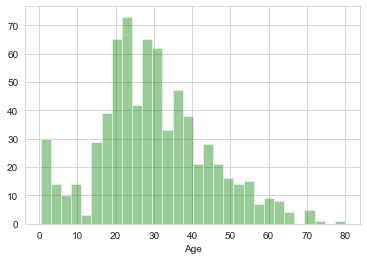

In [35]:
sns.distplot(train['Age'].dropna(), kde = False, bins = 30, color = 'green')

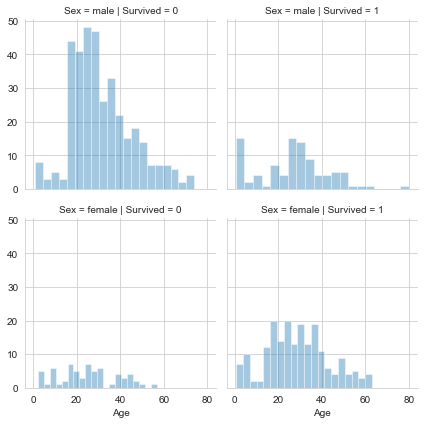

In [38]:
g = sns.FacetGrid(data = train, col = 'Survived', row= 'Sex')
g.map(sns.distplot, 'Age', bins = 20, kde = False)

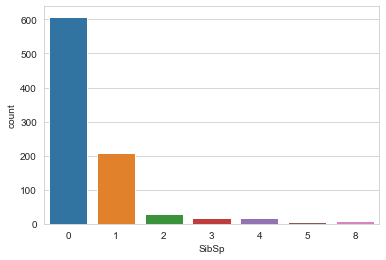

In [41]:
sns.countplot(x= 'SibSp', data = train)

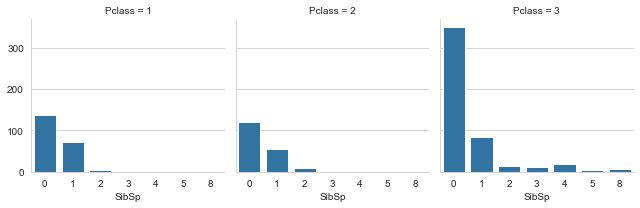

In [40]:
g = sns.FacetGrid(data = train, col = 'Pclass')
g.map(sns.countplot, 'SibSp')

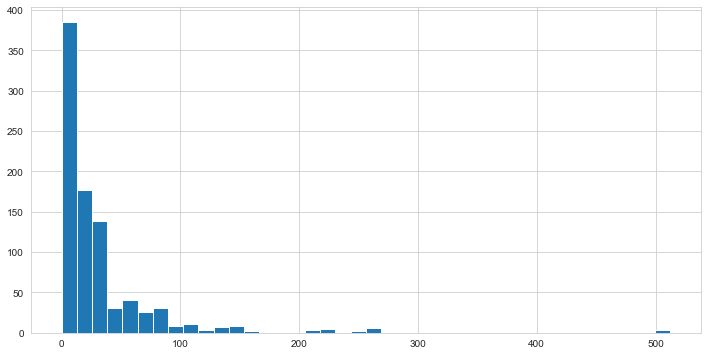

In [42]:
train['Fare'].hist(bins = 40, figsize = (12, 6))

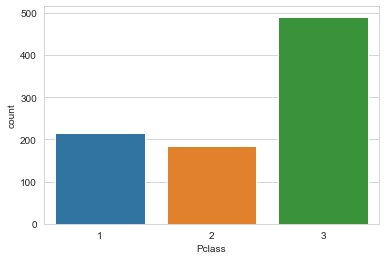

In [43]:
sns.countplot(x= 'Pclass', data = train)

# Data Cleaning

### Dealing with the Missing Values

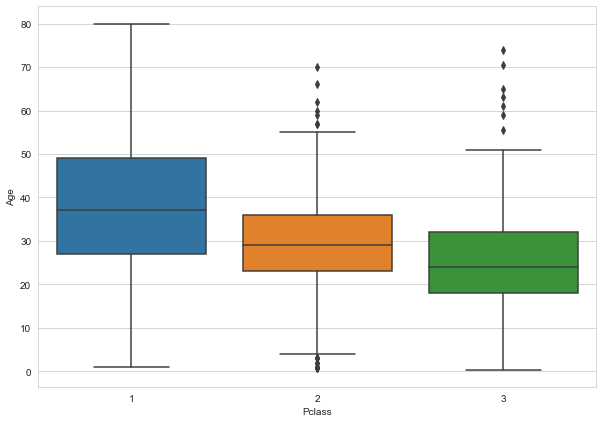

In [45]:
plt.figure(figsize = (10,7))
sns.boxplot(x= 'Pclass', y= 'Age', data = train)

In [101]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return train[train['Pclass']==1]['Age'].mean()
        
        elif Pclass == 2:
            return train[train['Pclass'] == 2]['Age'].mean()
        
        else:
            return train[train['Pclass']== 3]['Age'].mean()
        
    else:
        return Age

In [102]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis = 1)

In [103]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


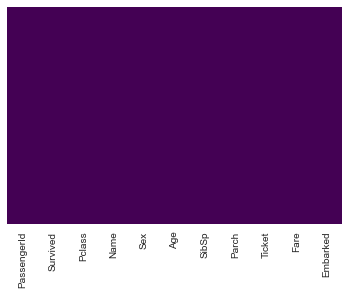

In [109]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [105]:
train.drop('Cabin', axis = 1, inplace = True)

In [106]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [108]:
train.dropna(inplace = True)

## Dealing with the Categorical Variables...

In [110]:
## So we take help of Dummy Variables for the Sex columns and the Embarked columns

In [113]:
sex = pd.get_dummies(train['Sex'], drop_first= True)

In [117]:
embark = pd.get_dummies(train['Embarked'], drop_first= True)

In [118]:
train = pd.concat([train, sex, embark], axis = 1)

In [119]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


#### These categorical columns have now been converted to numerical columns using dummy variables so that they can be used by machine learning

In [120]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [122]:
train.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0


In [125]:
# Drop Passenger Id, since it has no effect
train.drop('PassengerId', axis = 1, inplace = True)

In [126]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Training and Testing Model

In [127]:
X = train.drop('Survived', axis = 1)
y = train['Survived'] 

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
logmodel  = LogisticRegression()

In [137]:
logmodel.fit(X_train, y_train)

C:\Users\master\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [138]:
predictions = logmodel.predict(X_test)

In [139]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [140]:
y_test

511    0
613    0
615    1
337    1
718    0
      ..
792    0
828    1
732    0
669    1
634    0
Name: Survived, Length: 267, dtype: int64

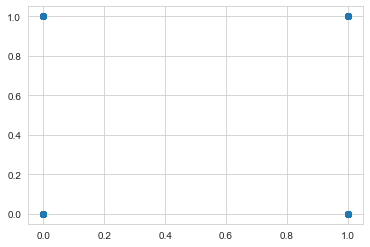

In [141]:
plt.scatter(y_test, predictions)

In [143]:
from sklearn.metrics import classification_report

In [144]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [145]:
from sklearn.metrics import confusion_matrix

In [146]:
confusion_matrix(y_test, predictions)

array([[149,  14],
       [ 31,  73]], dtype=int64)